# DS3000 Final Project : Predicting Flight Delays

## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

C:\Users\rayjv\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# create and clean master df
df = pd.read_csv("Combined_Flights_2022.csv")

In [3]:
# assess df
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [4]:
df.shape

(4078318, 61)

In [5]:
df.describe(include = "all", datetime_is_numeric=True)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
count,4078318,4078318,4078318,4078318,4078318,4078318,4.078318e+06,3.957885e+06,3.957823e+06,3.957823e+06,...,3.955652e+06,3.954076e+06,3.954076e+06,4.078318e+06,3.944916e+06,3.944916e+06,3.944916e+06,4078318,4.078318e+06,4.078318e+06
unique,212,21,375,375,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN
top,2022-07-21,Southwest Airlines Co.,ATL,ATL,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200-1259,NaN,NaN
freq,20844,731925,183697,183671,3955126,4068108,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256772,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.329587e+03,1.334374e+03,1.601494e+01,1.309049e+01,...,1.356576e+03,1.455073e+03,7.894387e+00,1.486058e+03,7.528486e+00,2.164715e-01,-6.256103e-02,NaN,3.663516e+00,3.685098e-03
std,NaN,NaN,NaN,NaN,NaN,NaN,4.904801e+02,5.056219e+02,5.231498e+01,5.332016e+01,...,5.075580e+02,5.378428e+02,6.663118e+00,5.185078e+02,5.524625e+01,4.118393e-01,2.487442e+00,NaN,2.320848e+00,1.141331e-01
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,1.000000e+00,0.000000e+00,-7.800000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+02,0.000000e+00,-2.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,9.140000e+02,9.170000e+02,0.000000e+00,-5.000000e+00,...,9.320000e+02,1.044000e+03,4.000000e+00,1.103000e+03,-1.400000e+01,0.000000e+00,-1.000000e+00,NaN,2.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.320000e+03,1.325000e+03,0.000000e+00,-2.000000e+00,...,1.338000e+03,1.456000e+03,6.000000e+00,1.513000e+03,-5.000000e+00,0.000000e+00,-1.000000e+00,NaN,3.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.735000e+03,1.744000e+03,1.100000e+01,1.100000e+01,...,1.758000e+03,1.909000e+03,9.000000e+00,1.920000e+03,1.000000e+01,0.000000e+00,0.000000e+00,NaN,5.000000e+00,0.000000e+00


In [6]:
# check for NaN values
print(df.isnull().sum())

FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64


In [7]:
# remove NaN values
df.dropna(how='any', inplace=True)

In [8]:
print(df.isnull().sum())

FlightDate            0
Airline               0
Origin                0
Dest                  0
Cancelled             0
                     ..
ArrDel15              0
ArrivalDelayGroups    0
ArrTimeBlk            0
DistanceGroup         0
DivAirportLandings    0
Length: 61, dtype: int64


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [10]:
# check data types
print(df.dtypes)

FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings      int64
Length: 61, dtype: object


In [11]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

<AxesSubplot:>

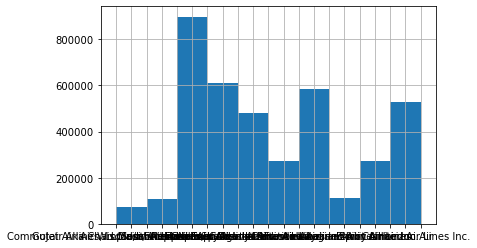

In [13]:
df["Airline"].hist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

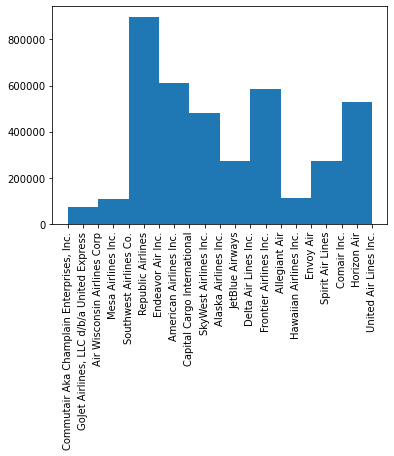

In [14]:
plt.hist(df["Airline"])
plt.xticks(rotation='vertical')

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

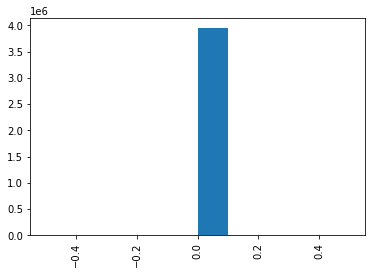

In [15]:
plt.hist(df["Cancelled"])
plt.xticks(rotation='vertical')

# Methods

In [16]:
# relevant columns
col_list = [
    'Airline',
    'Flight_Number_Operating_Airline',
    'FlightDate',
    'Origin',
    'OriginCityName',
    'CRSDepTime',
    'DepTime', 
    'Dest',
    'DestCityName',
    'CRSArrTime',
    'ArrTime',
    'ArrDelayMinutes',
    'DepDelayMinutes',
    'Cancelled', 
    'DepDel15',
    'Distance',
    'Year',
    'Month',
    'DayOfWeek'
    ]

df_flights = df.loc[:, col_list]

In [17]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944916 entries, 0 to 4078315
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Airline                          object 
 1   Flight_Number_Operating_Airline  int64  
 2   FlightDate                       object 
 3   Origin                           object 
 4   OriginCityName                   object 
 5   CRSDepTime                       int64  
 6   DepTime                          float64
 7   Dest                             object 
 8   DestCityName                     object 
 9   CRSArrTime                       int64  
 10  ArrTime                          float64
 11  ArrDelayMinutes                  float64
 12  DepDelayMinutes                  float64
 13  Cancelled                        bool   
 14  DepDel15                         float64
 15  Distance                         float64
 16  Year                             int64  
 17  Month   

In [18]:
df_flights.DepDel15.value_counts()

0.0    3085411
1.0     859505
Name: DepDel15, dtype: int64

In [19]:
# randomly sample 1/4 of dataset
df_flights = df.sample(frac=.25)
df_flights

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
3872833,2022-03-28,United Air Lines Inc.,EWR,JAX,False,False,1929,2025.0,56.0,56.0,...,2041.0,2228.0,3.0,2203,28.0,1.0,1.0,2200-2259,4,0
3157068,2022-01-27,Southwest Airlines Co.,DEN,BOS,False,False,1155,1150.0,0.0,-5.0,...,1229.0,1746.0,7.0,1740,13.0,0.0,0.0,1700-1759,8,0
2071104,2022-05-09,Delta Air Lines Inc.,ATL,LAX,False,False,2023,2027.0,4.0,4.0,...,2037.0,2148.0,19.0,2215,-8.0,0.0,-1.0,2200-2259,8,0
3448611,2022-01-03,United Air Lines Inc.,DEN,MCO,False,False,750,808.0,18.0,18.0,...,819.0,1321.0,8.0,1324,5.0,0.0,0.0,1300-1359,7,0
2556764,2022-06-27,Allegiant Air,MCI,VPS,False,False,2017,2004.0,0.0,-13.0,...,2019.0,2205.0,11.0,2228,-12.0,0.0,-1.0,2200-2259,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984508,2022-01-27,Delta Air Lines Inc.,JFK,MSP,False,False,759,753.0,0.0,-6.0,...,839.0,1012.0,6.0,1015,3.0,0.0,0.0,1000-1059,5,0
3438630,2022-01-05,United Air Lines Inc.,EWR,ORD,False,False,1309,1332.0,23.0,23.0,...,1343.0,1438.0,16.0,1447,7.0,0.0,0.0,1400-1459,3,0
2689708,2022-06-06,Southwest Airlines Co.,MDW,DEN,False,False,615,620.0,5.0,5.0,...,630.0,749.0,7.0,750,6.0,0.0,0.0,0700-0759,4,0
2705052,2022-06-22,Southwest Airlines Co.,SFO,DEN,False,False,1510,1552.0,42.0,42.0,...,1603.0,1905.0,5.0,1845,25.0,1.0,1.0,1800-1859,4,0


In [20]:
df_flights.DepDel15.value_counts()

0.0    771806
1.0    214423
Name: DepDel15, dtype: int64

In [21]:
# input feature list
x_feat_list = ['Flight_Number_Operating_Airline', 'CRSDepTime', 'CRSArrTime', 'Distance','Month', 'DayOfWeek']

# extract data from dataframe
x = df_flights.loc[:, x_feat_list].values
y = df_flights.loc[:, 'DepDel15'].values


X_train, X_test, y_train, y_test = train_test_split(x,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                    stratify=y      #preserve the distribution of the labels
                                                   )

## Random Forest Classifier and Feature Importance

In [22]:
# train classifier and fit with our data
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

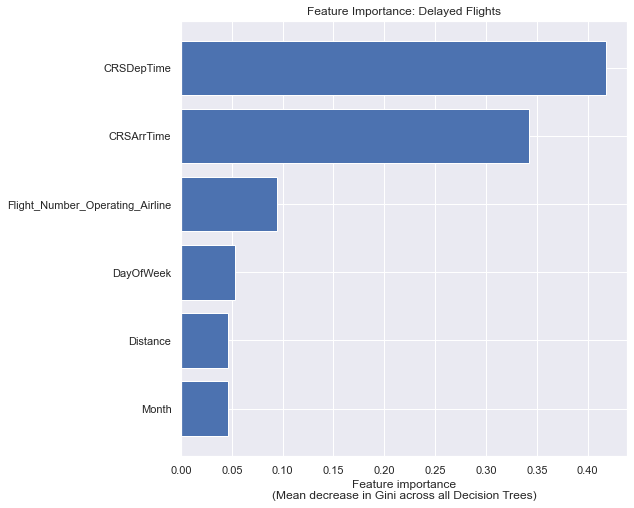

In [24]:
# format graph
sns.set()

# plot feature importance graph
plot_feat_import(x_feat_list, rf_clf.feature_importances_, limit=10)
plt.title('Feature Importance: Delayed Flights')
plt.gcf().set_size_inches(8, 8)

In [25]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(rf_clf.score(X_test, y_test)))

The accuracy of the model is: 0.782582832266983


## Decision Tree Classifier

In [26]:
# Build decision tree classifier to predict the target
dt = DecisionTreeClassifier(random_state=7, max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [27]:
#predict the labels for the test set
y_pred = dt.predict(X_test)

In [28]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(dt.score(X_test, y_test)))

The accuracy of the model is: 0.782582832266983


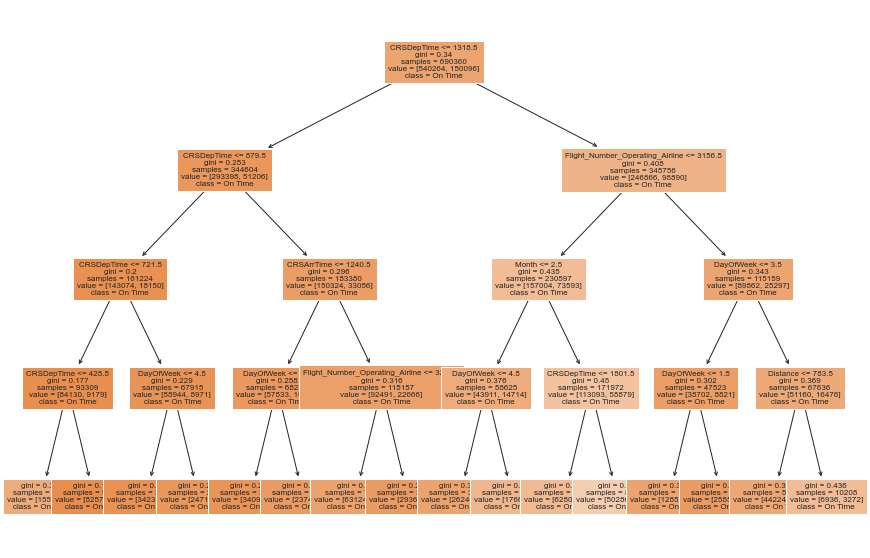

In [29]:
from sklearn import tree

target_names = ['On Time', 'Delayed']

fig = plt.figure(figsize=(80, 80)), plt.gcf().set_size_inches(15, 10)
tree.plot_tree(dt, 
                   feature_names=x_feat_list,  
                   class_names=target_names,
                   filled=True, fontsize=8)

plt.show()

## K-NN Classifier

In [30]:
knn = KNeighborsClassifier(n_neighbors = 20) #initialize the classifier and set the number of neighbors


knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [31]:
#predict the labels for the test set
y_pred   = knn.predict(X_test)

print('The predicted delay is: {}'.format(y_pred))

The predicted delay is: [0. 0. 0. ... 0. 0. 0.]


In [32]:
# Prediction accuracy
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

The accuracy of the model is: 0.7818257404459406


In [33]:
#identify a suitable value of k
predictions = {}

for k in range(3, 40, 2): #increment k by 2
    knn = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)

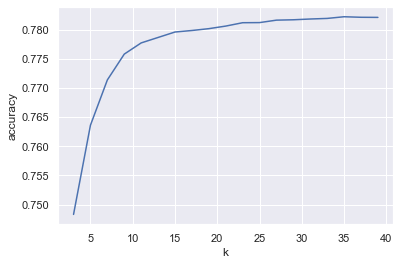

In [34]:
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.ylabel("accuracy")
plt.xlabel("k")
plt.show()

## Further analysis

In [35]:
# group all data by airline

df_grouped = df_flights.groupby(by='Airline').sum()
airlines = list(df_grouped.index)

C:\Users\rayjv\AppData\Local\Temp\ipykernel_32652\888018415.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_flights.groupby(by='Airline').sum()


Text(0, 0.5, 'Number of Delays > 15 Minutes')

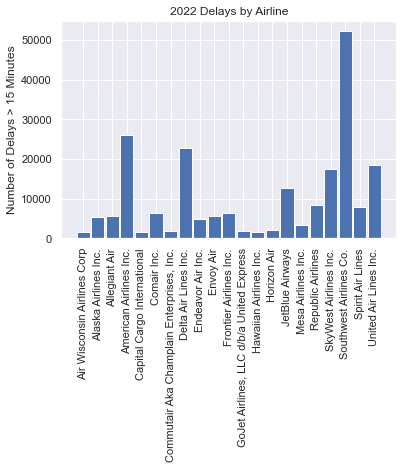

In [36]:
plt.bar(x=airlines, height=df_grouped['DepDel15'], width=.9)
plt.xticks(rotation=90)
plt.title('2022 Delays by Airline')
plt.ylabel('Number of Delays > 15 Minutes')